<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Redes%20CNN_Ejercicio%20ClaseACTUALIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [2]:
# Configuración del modelo
batch_size = 50
img_width, img_height, img_num_channels =  60000, 32, 32  # Forma de la imagen
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1
input_shape = (60000, 32, 32) #img_width, img_height, img_num_channels

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
# CIFAR: https://www.cs.toronto.edu/~kriz/cifar.html
assert train_images.shape == (50000, 32, 32, 3)  # Forma tensor juego imagenes de entrenamiento
assert test_images.shape == (10000, 32, 32, 3)  # Forma tensor juego imagenes de test
assert train_labels.shape == (50000,1)  # Forma tensor etiquetas de entrenamiento
assert test_labels.shape == (10000,1)  # Forma tensor etiquetas de test

169001437/169001437 [==============================] - 14s 0us/step


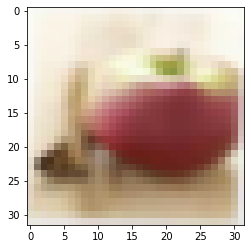

In [4]:
# Pintamos la tercera imagen de entrenamiento (la número 2 en el array)
import matplotlib.pyplot as plt
digit = train_images[2]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
print (train_images.shape)
print (train_labels.shape)

print(train_images[2].shape)
train_images[2]

(50000, 32, 32, 3)
(50000, 1)
(32, 32, 3)


array([[[250, 250, 248],
        [248, 249, 243],
        [247, 248, 239],
        ...,
        [250, 250, 246],
        [250, 250, 246],
        [249, 250, 246]],

       [[250, 251, 245],
        [248, 249, 238],
        [247, 247, 234],
        ...,
        [251, 251, 242],
        [251, 252, 243],
        [250, 251, 243]],

       [[251, 251, 244],
        [250, 248, 237],
        [250, 245, 233],
        ...,
        [250, 249, 238],
        [250, 249, 240],
        [250, 249, 242]],

       ...,

       [[221, 213, 191],
        [221, 206, 176],
        [225, 207, 181],
        ...,
        [199, 176, 134],
        [207, 193, 165],
        [233, 229, 226]],

       [[225, 223, 204],
        [227, 219, 196],
        [229, 216, 200],
        ...,
        [204, 185, 151],
        [212, 201, 180],
        [234, 232, 228]],

       [[233, 233, 226],
        [234, 232, 224],
        [235, 230, 225],
        ...,
        [219, 209, 194],
        [223, 216, 207],
        [232, 230, 228]]

In [6]:
# Normalizar imágenes de entrenamiento y de test


In [7]:
print (train_images.shape)
print (train_labels.shape)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [8]:
# Crear el Modelo de red neuronal CNN con:
# stride = 1
# ventanas convolucionales de 3x3 HECHO
# ventanas de pooling de 2x2 HECHO
# funciones de activación 'relu' HECHO
# 3 capas convolucionales con 32, 64 y 128 filtros respectivamente HECHO
# Aplanamos la última salida y añadimos dos capas densas con función activación 
# 'relu' de 256 y 128 neuronas cada una. Se aplana con Flatten HECHO


model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

#from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='softmax'))

# Tenemos en cuenta el número de clases a clasificar para poner la capa final
model.summary() #272372

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [9]:
# Compilamos el modelo con métrica preción

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
          batch_size= batch_size,
          epochs= no_epochs,
          verbose= verbosity,
          validation_split = validation_split)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/100
800/800 [==============================] - 13s 6ms/step - loss: 4.1412 - accuracy: 0.0567 - val_loss: 3.7859 - val_accuracy: 0.1144
Epoch 2/100
800/800 [==============================] - 4s 5ms/step - loss: 3.5283 - accuracy: 0.1539 - val_loss: 3.3674 - val_accuracy: 0.1856
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 3.1618 - accuracy: 0.2224 - val_loss: 3.1415 - val_accuracy: 0.2313
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 2.9179 - accuracy: 0.2690 - val_loss: 2.9519 - val_accuracy: 0.2634
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 2.7224 - accuracy: 0.3073 - val_loss: 2.8223 - val_accuracy: 0.3010
Epoch 6/100
800/800 [==============================] - 4s 4ms/step - loss: 2.5623 - accuracy: 0.3413 - val_loss: 2.7302 - val_accuracy: 0.3135
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 2.4254 - accuracy: 0.3679 - val_loss: 2.7129 - val_accuracy: 0.327

In [10]:
# Ejecutamos el entrenamiento con el validation_split explicitado anteriormente



Test loss: 2.4945602416992188 / Test accuracy: 0.8137400150299072


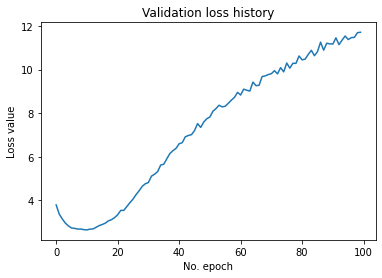

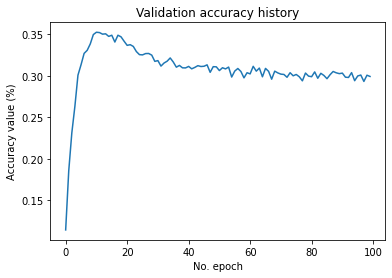

In [11]:
# Generamos las métricas de generalización
score = model.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()